In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# 이미지를 파일로 출력하고 로딩한 다음 글씨만 추출
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


(-0.11881377209280353,
 4.140158966213945,
 0.02958197717253727,
 1.0142039520339077)

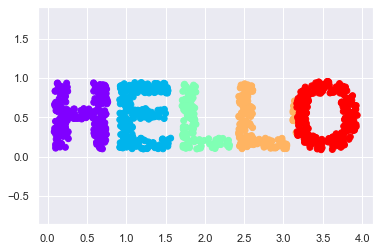

In [3]:
X = make_hello(1000)
colorize = dict(c=X[:,0], cmap=plt.cm.get_cmap('rainbow',5))

plt.scatter(X[:,0], X[:,1], **colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

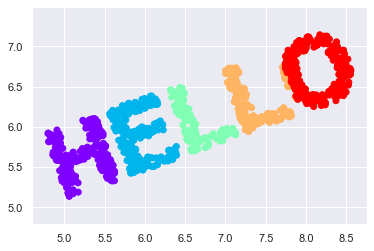

In [8]:
print(X.shape)
def rotate(X, angle):
    theta = np.deg2rad(angle) # 라디안 - 호의 길이
    R = [[np.cos(theta), np.sin(theta)], # 2차원 행렬회전
        [-np.sin(theta), np.cos(theta)]]
    print(type(R))
    return np.dot(X, R) # 1000X2 @ 2X2
X2 = rotate(X,20) + 5
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

(1000, 1000)


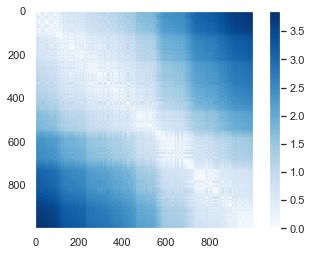

In [11]:
# 각 점들간의 상호거리
from sklearn.metrics import pairwise_distances # 디폴트 - 유클라디안 거리
D = pairwise_distances(X) # 거리행렬
print(D.shape)
D[:5, :5]
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [12]:
D2 = pairwise_distances(X2)
np.allclose(D, D2) # 원형을 유지하고 있음

True

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


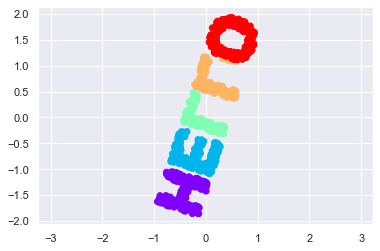

In [13]:
from sklearn.manifold import MDS
# 미리 계산된 거리행렬을 이용해 차원 축소함
model = MDS(n_components=2, dissimilarity='precomputed', 
           random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal')
print(out)
# 3차원 hello 만들어서 2차원으로 축소하면 재밌겠당

In [14]:
import numpy as np
rng = np.random.RandomState(10) # seed값 : 랜덤을 어디에서 시작하느냐
C = rng.randn(3,3) # 정규분포
print(np.dot(C, C.T)) # 전치행렬 C@C.T 행렬의 거듭제곱 (정방행렬+대칭행렬)
e, V = np.linalg.eigh(np.dot(C, C.T)) # 고유값분해
print("eigenvector", V)
print("eigenvalue", e)

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]


In [15]:
np.dot(V[1], V[2]) # 직교한당~

-3.122502256758253e-17

In [18]:
# 2차원의 데이터를 3차원으로 변환
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1] # 열(변수)
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    print("C는 ", C.shape)
    print(np.dot(C, C.T))
    e, V = np.linalg.eigh(np.dot(C, C.T))
    print("V는 ", V.shape)
    print("차원은 ", V[:X.shape[1]])
    return np.dot(X, V[:X.shape[1]])
print(X.shape)
print(X.shape[1])
print("데이터의 차원은 ", X.shape)
X3 = random_projection(X,3)
X3.shape

(1000, 2)
2
데이터의 차원은  (1000, 2)
C는  (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는  (3, 3)
차원은  [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

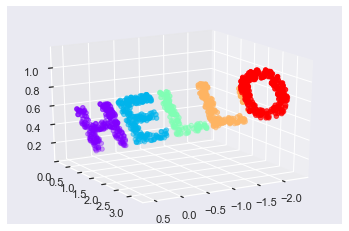

In [23]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:,0], X3[:,1], X3[:,2], **colorize)
ax.view_init(azim=60, elev=20) # 각도조절 (좌우, 상하)

(-1.0390064107727621,
 1.0377133989963219,
 -2.0646660054511297,
 2.135458244484912)

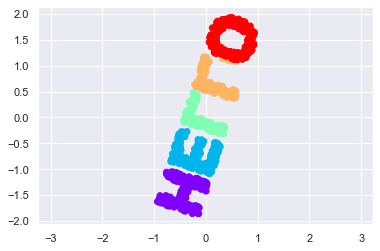

In [42]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')
# MDS는 선형 변환에 강하다

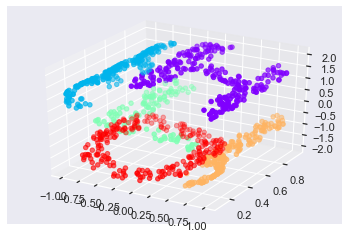

In [40]:
# MDS는 비선형에는 취약하다
from mpl_toolkits import mplot3d
def make_hello_s_curve(X):
    t = (X[:,0]-2)*0.75*np.pi
    x = np.sin(t)
    y = X[:,1]
    z = np.sign(t)*(np.cos(t)-1) # sign = +-
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:,0], XS[:,1], XS[:,2], **colorize)

(-1.3226393849603086,
 1.1799486556119945,
 -2.1918230064186113,
 2.3891359457585013)

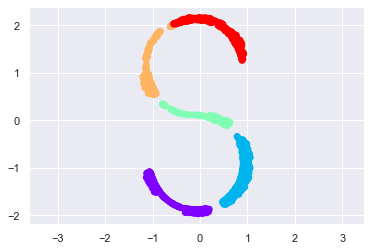

In [33]:
# MDS는 비선형에서 모양 유지가 안됨
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

In [ ]:
# LLE (locally linear embedding)
- 비선형에 강함

(0.15, -0.15)

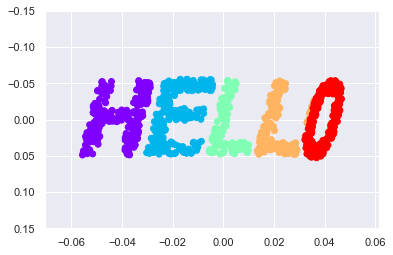

In [36]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2,
                              method='modified', eigen_solver='dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15, -0.15)

In [56]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib import pylab 
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d # 3차원 출력을 위한 것
from sklearn import manifold # 다형체
import os # 디렉토리 관리
CHART_DIR = "./"
colors = ['r','g','b']
markers=['o',6,'*']

def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white')
    mds = MDS(n_components=3) # 변수 4 -> 3
    Xtrans = mds.fit_transform(X) # 150X3
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15) # 카메라 각도 조절

    mds = MDS(n_components=2)
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight") 


C:\Users\ICT01_05\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_05\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_05\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_05\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_05\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_05\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 5089

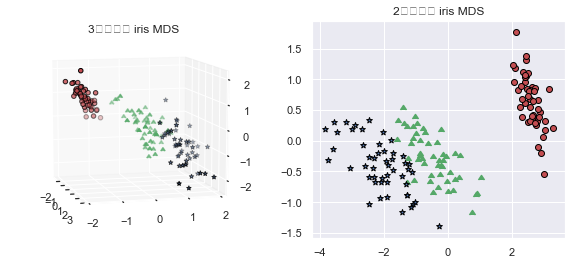

In [57]:
plot_iris_mds()

In [ ]:
# kmeans : 군집분석 => 종속변수 결정
- 압축 : 팔레트, 실제데이터:팔레트 번호(256) 1바이트로 표현 가능
- 원형이상치 제거
- 미리 군집화해서 문제 해결에 도움을 줌
# 알고리즘 - k값을 결정(군집수 결정), 중심값 : 중심이 변화(재계산)
- 문제점 : 이상치에 민감
# K means의 척도 : 거리값 (피타고리스 정리 ->  euclidian distance)
# DBSCAN : eps기본 거리값, 군집이 되기 위한 최소요소수
- 핵심, 경계, 어느 군집에도 속하지 않는 것
https://bcho.tistory.com/1205

In [58]:
import scipy
import sklearn.metrics.pairwise

a_64 = np.array([61.22, 71.60, -65.755], dtype=np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype=np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
# norm 원점으로부터의 크기 (단일벡터)
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)],
                     dtype=np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 - b_32)],
                     dtype=np.float32)
# euclidian distance 가 default
ist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64], [b_32], metric="manhattan")
from sklearn.metrics.pairwise import euclidian_distances

In [62]:
from sklearn.svm import SVC # Classification
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# kmeans, PCA는 전처리에 민감 (전처리를 안하면 값의 크기가 큰 변수가 중요해짐)
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("테스트 점수: {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수: 0.95


C:\Users\ICT01_05\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [64]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid = param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트 점수: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 정확도: 0.98
테스트 점수: 0.97
최적의 매개변수:  {'C': 1, 'gamma': 1}


In [67]:
from sklearn.pipeline import Pipeline
# 파이프라인에 이름 주는 이유 : 참조하여 파라미터를 전달하기 위해서
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(pipe.score(X_test, y_test)))

테스트 점수: 0.95


C:\Users\ICT01_05\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [68]:
from sklearn.model_selection import GridSearchCV
# regularizarion 규제 : 과적합 (규제 강조: C, )
param_grid = {'svm__C':[0.001, 0.01, 0.1, 1, 10, 100], # 처음에는 대충 -> 찾아가면서 좁혀줌
             'svm__gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트 점수: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 정확도: 0.98
테스트 점수: 0.97
최적의 매개변수:  {'svm__C': 1, 'svm__gamma': 1}


In [69]:
# 초기 중심값이 결정 입력 => 중심이 계속 변함 (문제 해결 전까지)
# 중심과의 거리값
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris()
X = iris.data[:,:2] # 전체 변수 4개 중 2개로 줄여서 봄
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

array([[4.76666667, 2.89166667],
       [6.85348837, 3.1       ],
       [5.90980392, 2.73529412],
       [5.1875    , 3.6375    ]])

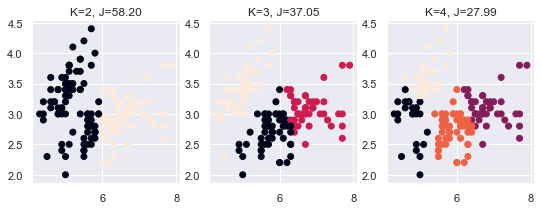

In [74]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(X[:,0], X[:,1], c=km2.labels_) # 컬러 2개 (label = 군집 번호)
plt.title("K=2, J=%.2f" % km2.inertia_) # 군집 내부 거리 값
plt.subplot(132)
plt.scatter(X[:,0], X[:,1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:,0], X[:,1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)
km4.cluster_centers_ # 중심값 출력됨

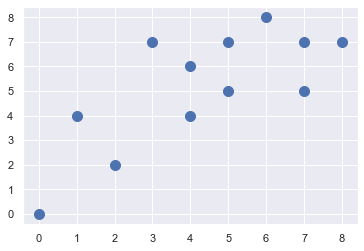

In [75]:
X = np.array([[7,5],[5,7],[7,7],[4,4],[4,6],[1,4],
             [0,0],[2,2],[8,7],[6,8],[5,5],[3,7]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

12


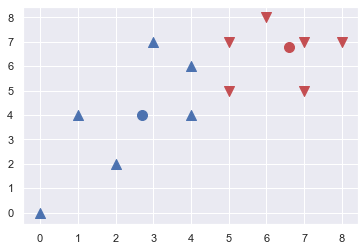

In [82]:
from sklearn.cluster import KMeans
# 레이블 : 군집번호 : 종속변수
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)
c0, c1 = model.cluster_centers_
print(len(model.labels_))
# boolean indexing
plt.scatter(X[model.labels_==0, 0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c='r')
plt.scatter(c1[0], c1[1], s=100, c='b')
plt.show()

In [87]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [98]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
n_colors = 8
# 1바이트 = 8비트 = 256가지
china = load_sample_image("flower.jpg") # RGB (256컬러 : 1바이트)
# 컬러값 정규화
china = np.array(china, dtype=np.float64) / 255

In [99]:
w, h, d = original_shape = tuple(china.shape)
print(w, h, d)
assert d == 3 # RGB로 표현된 컬러값만 들어와라~
image_array = np.reshape(china, (w*h, d)) # 계산하기 쉽게 하기 위해서 2차원으로 바꿔줌

427 640 3


In [100]:
image_array_sample = shuffle(image_array, random_state=0)[:1000] # 전체 컬러 중 랜덤으로 1000개 뽑아서 이미지를 대표할 컬러값 찾음
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample) # 64개 컬러로 군집화

In [101]:
labels = kmeans.predict(image_array) # 427 X 640

In [102]:
len(labels)

273280

In [103]:
def recreate_image(codebook, labels, w, h): # codebook = 64컬러값, labels= 이미지 픽셀수만큼 레이블이 있음
    d = codebook.shape[1] # 64X3
    image = np.zeros((w, h, d)) # 원래 이미지 사이즈
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

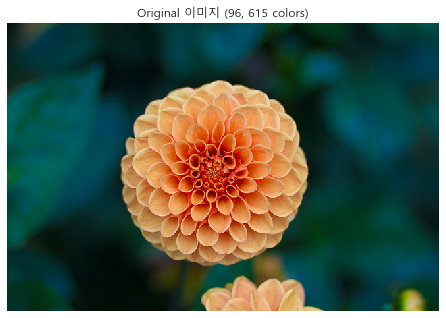

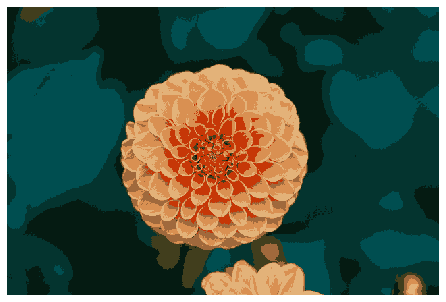

In [104]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96, 615 colors)')
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

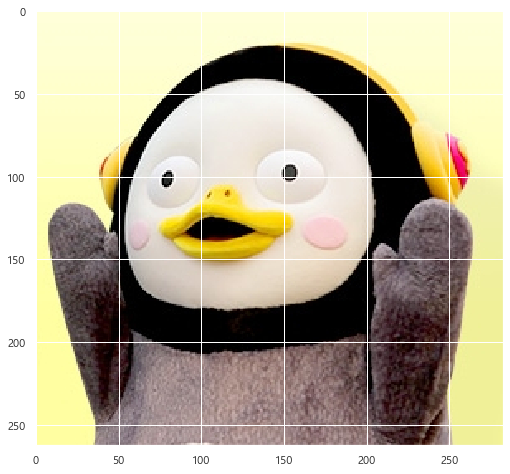

In [117]:
# png는 R + G + B + alpha 값으로 표현해서 4임!
image = plt.imread("pengg.jpg")
plt.figure(figsize=(15,8))
plt.imshow(image)

In [118]:
image.shape
image.shape[0]*image.shape[1]*image.shape[2]
x, y, z = image.shape
image = np.array(image, dtype=np.float64) / 255
image_2d = image.reshape(x*y, z) # kmeans는 2차원만 이해할 수 있어어
image_2d.shape

(74429, 3)

In [119]:
kmeans_cluster = cluster.KMeans(n_clusters=16)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[0.00992009, 0.0029752 , 0.0034131 ],
       [0.89695048, 0.84136274, 0.79013221],
       [0.34862722, 0.27984724, 0.27766406],
       [0.99792175, 0.99806134, 0.80932186],
       [0.65640321, 0.57077654, 0.56077999],
       [0.96994624, 0.84127451, 0.35985136],
       [0.96768978, 0.96040687, 0.62883197],
       [0.92699745, 0.77094398, 0.07341055],
       [0.94117755, 0.92244874, 0.89888635],
       [0.25812079, 0.17399033, 0.17263169],
       [0.5559249 , 0.47277686, 0.47222002],
       [0.79841167, 0.73358221, 0.67102032],
       [0.88581614, 0.12215432, 0.31280876],
       [0.72959535, 0.56629695, 0.09185854],
       [0.44235861, 0.37127346, 0.37567434],
       [0.1609406 , 0.0633433 , 0.06248462]])

In [112]:
len(cluster_centers)
cluster_centers.shape

(16, 4)

In [120]:
cluster_labels = kmeans_cluster.labels_
cluster_labels

array([3, 3, 3, ..., 6, 6, 6])

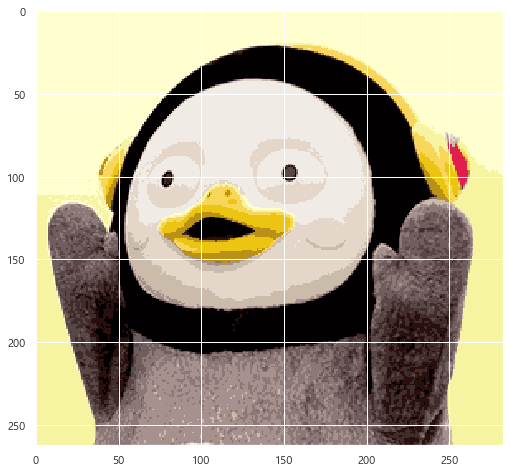

In [121]:
plt.figure(figsize=(15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

In [ ]:
# 원형 이상치 제거

In [123]:
from sklearn.datasets import make_blobs
X, label = make_blobs(100, centers=1)
kmeans = KMeans(n_clusters=1) # 중심 1개
kmeans.fit(X)
distances = kmeans.transform(X) # 각 데이터의 중심으로부터 거리값으로 변환
# argsort : index를 sort하라 (이 값을 기준으로 다른 놈을 컨트롤 하고 싶어서!)
# ::-1 => 내림차순으로 하라 (원래 argsort는 오름차순)
# ::2 => 두 칸 건너뛰면서 빼내라
sorted_idx = np.argsort(distances.ravel())[::-1][:5] # ravel() 1차원으로 만들 때

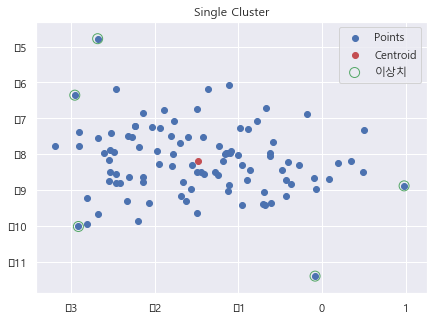

In [126]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:,0], X[:,1], label='Points')
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:,1],
          label = 'Centroid', color='r')
ax.scatter(X[sorted_idx][:,0],
          X[sorted_idx][:,1],
          label = '이상치', edgecolors='g',
          facecolors='none', s=100)
ax.legend(loc='best')

In [128]:
# PCA : Principal Component Analysis 주성분 분석
# 모델 입력 전 단계에서 특징 추출 (noise 제거)
# PCA의 결과를 모델의 변수로 추가하면 정확도가 상승
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1,-1], [-2,-1], [-3,-2], [1,1], [2,1], [3,2]])
pca = PCA(n_components=2) # 주성분 2개
pca.fit(X)
print(pca.explained_variance_ratio_) # 설명력
# 축 이름을 재명명해야함
# 차원축소를 하는 이유
- 노이즈 제거
- 속도 개선
- 차원의 저주 => 복잡한 문제를 해결

[0.99244289 0.00755711]


In [130]:
print(pca.explained_variance_) # 주성분분석에서는 분산이 큰 놈이 최고 (...)
print(pca.noise_variance_)

[7.93954312 0.06045688]
0.0


In [ ]:
# svd 희소행렬 특징추출, 비정방행렬인 경우 사용
# 500X500이면 randomized를 써라
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = PCA(n_components=2, svd_solver='full')
# singular value decomposition (https://darkpgmr.tistory.com/106)
# randomized (크기가 큰 데이터는 randomized 해야 함)
# arpack 희소행렬인 경우 0을 줄여서 출력해줘라
pca.fit(X)
print(pca.explained_variance_ratio)

In [131]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_test.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(143, 30)


In [132]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.62


C:\Users\ICT01_05\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트 정확도: 0.97


C:\Users\ICT01_05\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [145]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 30)


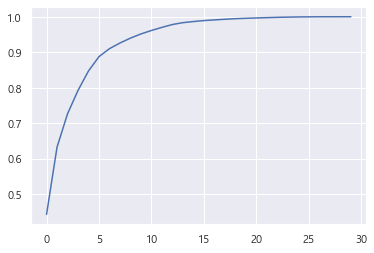

In [149]:
pca = PCA(n_components=30)
pca.fit(X_scaled)
## 2개의 주성분을 출력 (28개의 특성을 제거)
X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # elbow를 시각적으로 확인

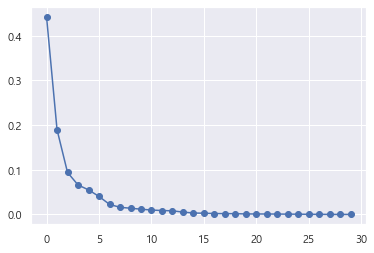

In [150]:
plt.plot(pca.explained_variance_ratio_, 'bo-')

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 정규화
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) # 정규화한 값으로 변환
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components=6) # 주성분 분석
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 정확: {:.2f}".format(svm.score(X_t_test, y_test)))

SVM 테스트 정확: 0.92


C:\Users\ICT01_05\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [168]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))
# 주성분을 30개의 변수가 설명하고 있다 => 주성분 축 : 명명
# 주성분을 이루고 있는 변수의 기여도를 보고 명명식

PCA 주성분 형태: (6, 30)


In [169]:
print("PCA 주성분: {}".format(pca.components_))

PCA 주성분: [[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.09276647e-01  2.71509521e-0

C:\Users\ICT01_05\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_05\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


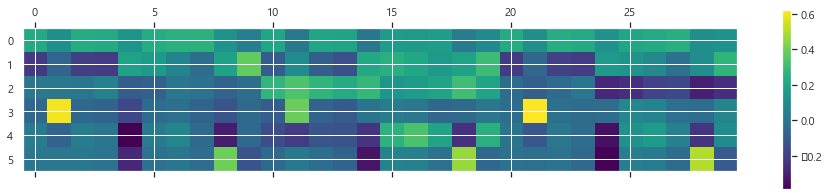

In [170]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()

(87, 65)


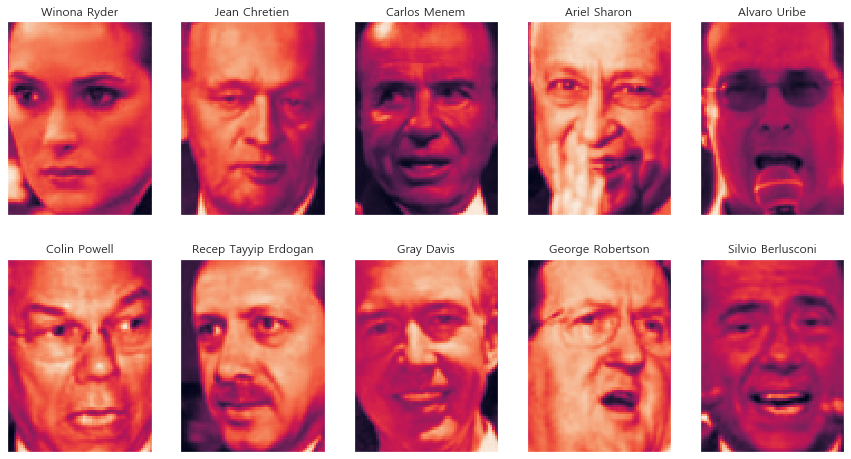

In [171]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(image_shape) # 이미지를 가로 X 세로, 행렬은 행부터 (87 = 세로, 65 = 가로)
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])




In [172]:
print("이미지 사이즈: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

이미지 사이즈: (3023, 87, 65)
클래스 개수: 62


In [174]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

In [176]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state=0)

In [177]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

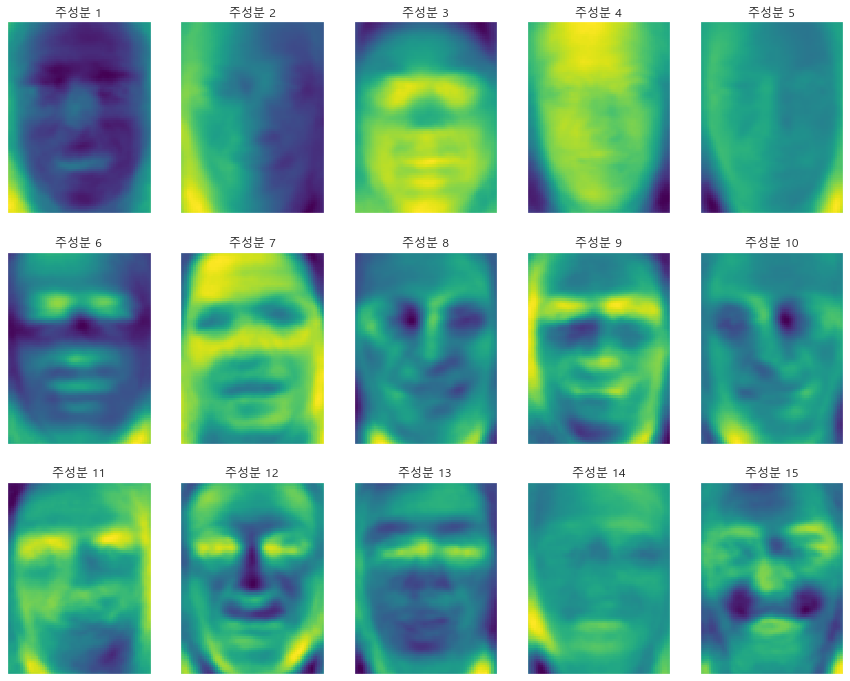

In [181]:
fig, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image.shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

In [ ]:
# 컴퓨터가 주성분 분석을 통해 찾아낸 주성분
# 100개를 합하여 출력하면 원본 이미지를 복원 => ANN의 가중치 특징도 설명 불가능~~